# Single Validation

Validate a single simulation:
1. Correctly correlating MT growth state to grid size change
2. MT growth rate does not exceed `vp`
3. Grid size change occurs only in +/- 1 grids
4. Grid DNE blocks exist only in a single uninterrupted sequence

In [4]:
# imports
from pathlib import Path

import matplotlib.pyplot as plt

from simulation import Simulation


# set plotting style
plt.style.use(["default", "biophysics.mplstyle"])

In [5]:
# import simulation data to the Simulation class
data_file = Path("data/tests/simulation.mat")
color_dict = {2: 'tab:blue', 3: 'tab:orange'}
sim = Simulation(data_file, color_dict)

Start protein: 1, index: 0
Start protein: 1, index: 0


KeyError: 3

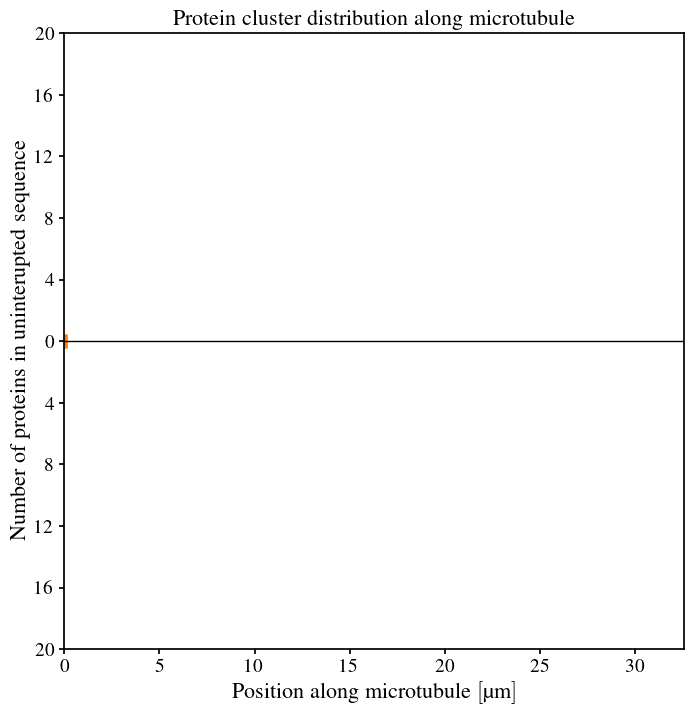

In [6]:
# plot sequence
fig, ax = plt.subplots()
sim.plot_sequence_at(ax, 10)